In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline
from __future__ import division
from __future__ import print_function
from scipy.optimize import curve_fit
import os

In [2]:
datadirectory = 'data_membrane_meas'
def makename(filename):
    return os.path.join(datadirectory,filename)

In [96]:
class membraneThickness(object):
    '''Data and fit parameters for membrane thickness measurements as a function of layer exposure time
    
    Key results are the following instance variables:
        data - 5 columns:
            0: layer exposure time (seconds)
            1: average measured membrane thickness (um)
            2: standard deviation of measured membrane thickness (um)
            3: normalized layer exposure time (normalized by critical time, T_c)
            4: normalized membrane thickness (normalized by h_a)
        
        fitparams:
            0: h_a (um)
            1: T_c (seconds)'''
    
    def __init__(self, data=None, filepathname=''):
        if data is None:
            if filepathname == '':
                print('ERROR: NO DATA OR FILENAME SPECIFIED FOR membraneThickness OBJECT')
                return
            else:
                self.rawmeasdata_pix = np.loadtxt(filepathname, delimiter=',', skiprows=1)
                layerexptimes = self.rawmeasdata_pix[0,:]
                self.rawmeasdata_um, tempave, tempstd = self.calc_ave_stdev_membrane_thickness_um(
                    self.rawmeasdata_pix[1:,:])
                self.data = np.array([layerexptimes,tempave,tempstd]).T
        else:
            self.data = data
            self.rawmeasdata_pix = None
            self.rawmeasdata_um = None
        # Calculate curve fit
        self.fitparams, self.covmatrix = curve_fit(self.membthickfunc, self.data[:,0], self.data[:,1])
        self.std_devs = np.sqrt(self.covmatrix.diagonal())
        # Add a column for layer exposure time divided by the critical time (i.e., normalized layer exposure time)
        temp = self.data[:,0]/self.fitparams[1]
        self.data = np.c_[self.data, temp]
        # Add a column for normalized membrane thickness
        temp = self.data[:,1]/self.fitparams[0]
        self.data = np.c_[self.data, temp]
    
    def membthickfunc(self,t,a,b):
        return a*np.log(t/b)
    
    def calc_ave_stdev_membrane_thickness_um(self,rawdata):
        # Replace zeros with NaN's
        rawdata[rawdata == 0] = np.NaN
        # Convert from pixels to microns (assumes pixel measurements are in x-direction)
        rawdata = rawdata * 1.8244
        # Calculate column averages and standard deviations
        columnaverages = np.nanmean(rawdata, axis=0)
        columnstdev = np.nanstd(rawdata, axis=0)
        return rawdata, columnaverages, columnstdev
    
    def layerexptime(self):
        return self.data[:,0]
     
    def normalized_layerexptime(self):
        return self.data[:,3]
   
    def ave_membranethickness(self):
        return self.data[:,1]
    
    def normalized_ave_membranethickness(self):
        return self.data[:,4]
   
    def stdev_membranethickness(self):
        return self.data[:,2]
   
    def h_a(self):
        return self.fitparams[0]
   
    def T_c(self):
        return self.fitparams[1]
    
    def fit(self):
        return self.membthickfunc(self.layerexptime(),self.h_a(),self.T_c())

In [97]:
a = membraneThickness(filepathname=makename('150415_10irga_01btex.csv'))
print(a.data)
print(a.fitparams)
print(a.h_a(),a.T_c())
print(a.layerexptime())

[[  2.00000000e+00   6.83846541e+02   2.33027140e+01   8.64015668e+00
    2.27743485e+00]
 [  1.00000000e+00   3.92854741e+02   8.72831309e+00   4.32007834e+00
    1.30833604e+00]
 [  5.00000000e-01   2.15281633e+02   1.65899401e+01   2.16003917e+00
    7.16958940e-01]
 [  2.50000000e-01   4.92653678e+01   1.25350024e+01   1.08001959e+00
    1.64069946e-01]]
[  3.00270518e+02   2.31477284e-01]
300.270518292 0.23147728369
[ 2.    1.    0.5   0.25]


/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:42: RuntimeWarning: invalid value encountered in log


In [71]:
data_0330 = np.array([[   0.3,    54.5,     9.49],
 [   0.35,  105.7,    15.94],
 [   0.4,   127.62,   13.19],
 [   0.45,  185.95,   15.6 ],
 [   0.5,   197.56,   16.36]])
a = membraneThickness(data_0330)
print(a.data)
print(a.fitparams)
print(a.h_a(),a.T_c())

[[  3.00000000e-01   5.45000000e+01   9.49000000e+00   1.21433879e+00
    1.89083095e-01]
 [  3.50000000e-01   1.05700000e+02   1.59400000e+01   1.41672859e+00
    3.66717122e-01]
 [  4.00000000e-01   1.27620000e+02   1.31900000e+01   1.61911839e+00
    4.42766689e-01]
 [  4.50000000e-01   1.85950000e+02   1.56000000e+01   1.82150818e+00
    6.45137642e-01]
 [  5.00000000e-01   1.97560000e+02   1.63600000e+01   2.02389798e+00
    6.85417546e-01]]
[  2.88233065e+02   2.47048025e-01]
288.233065043 0.247048025447


/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:42: RuntimeWarning: invalid value encountered in log


In [72]:
a = membraneThickness()

ERROR: NO DATA OR FILENAME SPECIFIED FOR membraneThickness OBJECT


In [73]:
help(a)

Help on membraneThickness in module __main__ object:

class membraneThickness(__builtin__.object)
 |  Data and fit parameters for membrane thickness measurements as a function of layer exposure time
 |  
 |  Key results are the following instance variables:
 |      data - 5 columns:
 |          0: layer exposure time (seconds)
 |          1: average measured membrane thickness (um)
 |          2: standard deviation of measured membrane thickness (um)
 |          3: normalized layer exposure time (normalized by critical time, T_c)
 |          4: normalized membrane thickness (normalized by h_a)
 |      
 |      fitparams:
 |          0: h_a (um)
 |          1: T_c (seconds)
 |  
 |  Methods defined here:
 |  
 |  T_c(self)
 |  
 |  __init__(self, data=None, filepathname='')
 |  
 |  ave_membranethickness(self)
 |  
 |  calc_ave_stdev_membrane_thickness_um(self, rawdata)
 |  
 |  h_a(self)
 |  
 |  layerexptime(self)
 |  
 |  membthickfunc(self, t, a, b)
 |  
 |  normalized_ave_membranet

# To do

- DONE 4/16/15 - Add methods to return the different columns of self.data
- DONE 4/16/15 - Add 150401 data to 150330 data for 1% Irgacure and 1% UV236
- DONE 4/17/15 - Fix raw data for 150330 & 150401 data to be in pixel units
- DONE 4/17/15 - Put data & code in a bitbucket repository with access by Hua & I
- DONE 4/17/15 - Plot all of the data we've got so far
- DONE 4/17/15 - Plot data as a function of normalized layer exposure time
- DONE 4/17/15 - Make function to plot of data for a dataset?

# Plot data - test out use of membraneThickness object

/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:42: RuntimeWarning: invalid value encountered in log


/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:42: RuntimeWarning: invalid value encountered in log


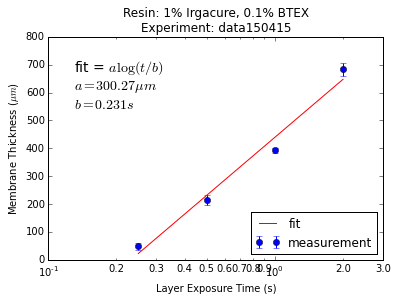

In [124]:
data = membraneThickness(filepathname=makename('150415_10irga_01btex.csv'))

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.errorbar(data.layerexptime(), data.ave_membranethickness(), 
            data.stdev_membranethickness(), linestyle='None', marker='o', label='measurement')
ax.plot(data.layerexptime(), data.fit(), 'r-', label='fit')
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
ax.set_xlim(0.1,3.0)
ax.legend(loc=4)
fittext = 'fit = $a \log(t/b)$\n$a={:.2f} \mu m$\n$b={:.3f}s$'.format(data.h_a(),data.T_c())
ax.text(0.13,550,fittext,fontsize=14)
ax.set_xlabel('Layer Exposure Time (s)')
ax.set_ylabel('Membrane Thickness ($\mu m$)')
ax.set_title('Resin: 1% Irgacure, 0.1% BTEX\nExperiment: data150415')


/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:42: RuntimeWarning: invalid value encountered in log


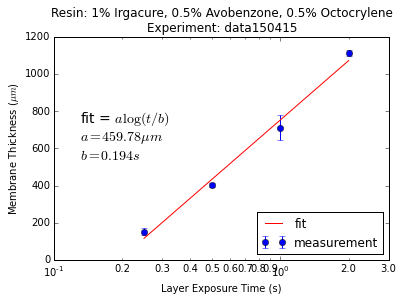

In [125]:
data = membraneThickness(filepathname=makename('150415_10irga_05avob_05octo.csv'))

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.errorbar(data.layerexptime(), data.ave_membranethickness(), 
            data.stdev_membranethickness(), linestyle='None', marker='o', label='measurement')
ax.plot(data.layerexptime(), data.fit(), 'r-', label='fit')
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
ax.set_xlim(0.1,3.0)
ax.legend(loc=4)
fittext = 'fit = $a \log(t/b)$\n$a={:.2f} \mu m$\n$b={:.3f}s$'.format(data.h_a(),data.T_c())
ax.text(0.13,550,fittext,fontsize=14)
ax.set_xlabel('Layer Exposure Time (s)')
ax.set_ylabel('Membrane Thickness ($\mu m$)')
ax.set_title('Resin: 1% Irgacure, 0.5% Avobenzone, 0.5% Octocrylene\nExperiment: data150415')


/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:42: RuntimeWarning: invalid value encountered in log


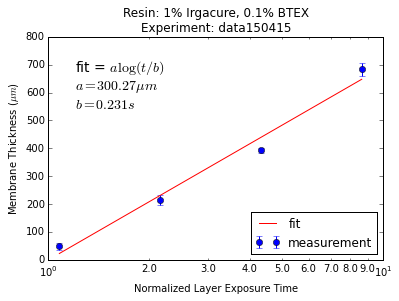

In [128]:
data = membraneThickness(filepathname=makename('150415_10irga_01btex.csv'))

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.errorbar(data.normalized_layerexptime(), data.ave_membranethickness(), 
            data.stdev_membranethickness(), linestyle='None', marker='o', label='measurement')
ax.plot(data.normalized_layerexptime(), data.fit(), 'r-', label='fit')
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
ax.set_xlim(1.0,10.0)
ax.legend(loc=4)
fittext = 'fit = $a \log(t/b)$\n$a={:.2f} \mu m$\n$b={:.3f}s$'.format(data.h_a(),data.T_c())
ax.text(1.2,550,fittext,fontsize=14)
ax.set_xlabel('Normalized Layer Exposure Time')
ax.set_ylabel('Membrane Thickness ($\mu m$)')
ax.set_title('Resin: 1% Irgacure, 0.1% BTEX\nExperiment: data150415')


/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:42: RuntimeWarning: invalid value encountered in log


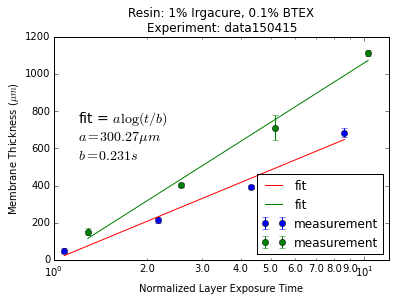

In [132]:
data = membraneThickness(filepathname=makename('150415_10irga_01btex.csv'))
data1 = membraneThickness(filepathname=makename('150415_10irga_05avob_05octo.csv'))

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.errorbar(data.normalized_layerexptime(), data.ave_membranethickness(), 
            data.stdev_membranethickness(), linestyle='None', marker='o', label='measurement')
ax.plot(data.normalized_layerexptime(), data.fit(), 'r-', label='fit')
ax.errorbar(data1.normalized_layerexptime(), data1.ave_membranethickness(), 
            data1.stdev_membranethickness(), linestyle='None', marker='o', label='measurement')
ax.plot(data1.normalized_layerexptime(), data1.fit(), 'g-', label='fit')
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
ax.set_xlim(1.0,12.0)
ax.legend(loc=4)
fittext = 'fit = $a \log(t/b)$\n$a={:.2f} \mu m$\n$b={:.3f}s$'.format(data.h_a(),data.T_c())
ax.text(1.2,550,fittext,fontsize=14)
ax.set_xlabel('Normalized Layer Exposure Time')
ax.set_ylabel('Membrane Thickness ($\mu m$)')
ax.set_title('Resin: 1% Irgacure, 0.1% BTEX\nExperiment: data150415')
